# Retail Analytics — Demand + Reorder Behavior (Instacart)

## Business Problem
Understand **demand patterns** (day/hour) and **reorder behavior** to improve:
- **Inventory planning** (what to stock more reliably)
- **Operations** (staffing/picking during peak demand)
- **Retention** (categories with high repeat purchase)

## Dataset
Instacart-style transactional dataset (orders, products, departments).  
Raw data is excluded from the repo due to size/licensing, but the pipeline is fully reproducible.

## Stack
- SQL (SQLite)
- Python (pandas, matplotlib)
- Jupyter Notebooks (GitHub Codespaces)
- Version control (Git + GitHub)

## Insights
1. Top products (volume)
2. Reorder rate by department (retention proxy)
3. Demand pattern (day/hour heatmap)


In [1]:
from pathlib import Path
from IPython.display import Image, display
import pandas as pd

OUT = Path("../outputs")
PROCESSED = Path("../data/processed")

def show_png(name: str):
    path = OUT / name
    if path.exists():
        display(Image(filename=str(path)))
    else:
        print(f"Missing: {path}")

def try_read_csv(name: str):
    path = PROCESSED / name
    if path.exists():
        return pd.read_csv(path)
    return None


## — Top products drive predictable demand

These products appear most frequently, suggesting they are “anchor” items customers return for.
Implications:
- **Inventory:** keep higher safety stock for the top movers to reduce stockouts.
- **Merchandising:** bundle top items with high-margin complements to lift basket size.


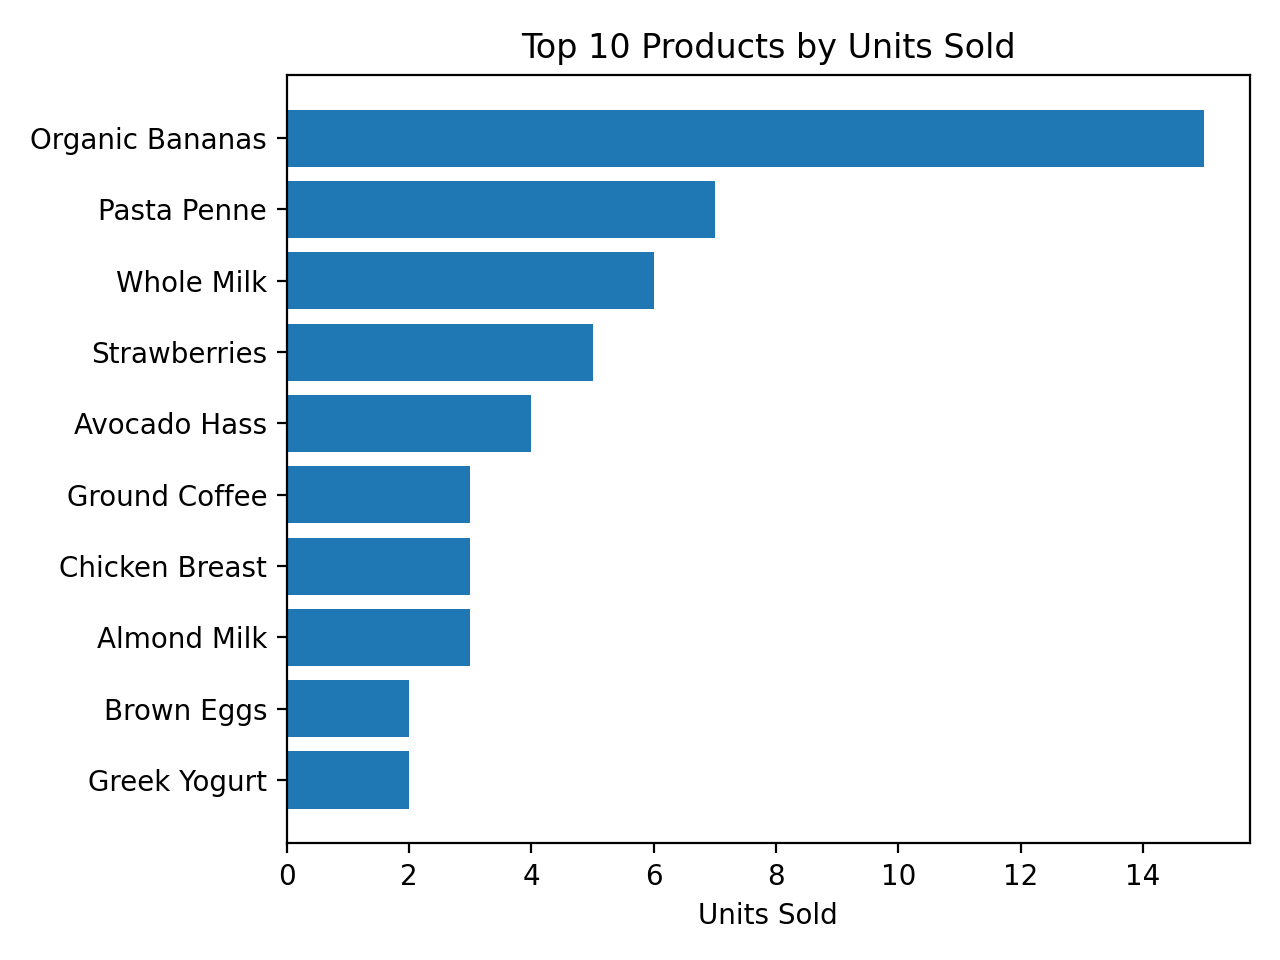

In [2]:
show_png("top_products.png")

top_products = try_read_csv("top_products.csv")
if top_products is not None:
    top_products.head(10)


## — Reorder rate highlights retention-heavy categories

Reorder rate is a proxy for habit/repurchase behavior.
Implications:
- **Retention:** prioritize promotions in departments with high reorder rate (sticky demand).
- **Assortment:** expand variety where reorder is high to capture repeat baskets.


In [6]:
from IPython.display import display

reorder_by_dept = try_read_csv("reorder_rate_by_department.csv")
if reorder_by_dept is not None:
    display(reorder_by_dept.head(10))
else:
    print("CSV not available locally (expected on GitHub).")

,department,reorder_rate,line_items
0,Produce,0.7500,12
1,Pantry,0.6667,3
2,Dairy,0.6250,8
3,Beverages,0.6000,5
4,Meat,0.5000,2


##  — Demand has time-based peaks (operations lever)

Order volume varies by day and hour.
Implications:
- **Operations:** staff picking/packing teams around peak windows.
- **Delivery capacity:** align slots and courier capacity to demand curves.


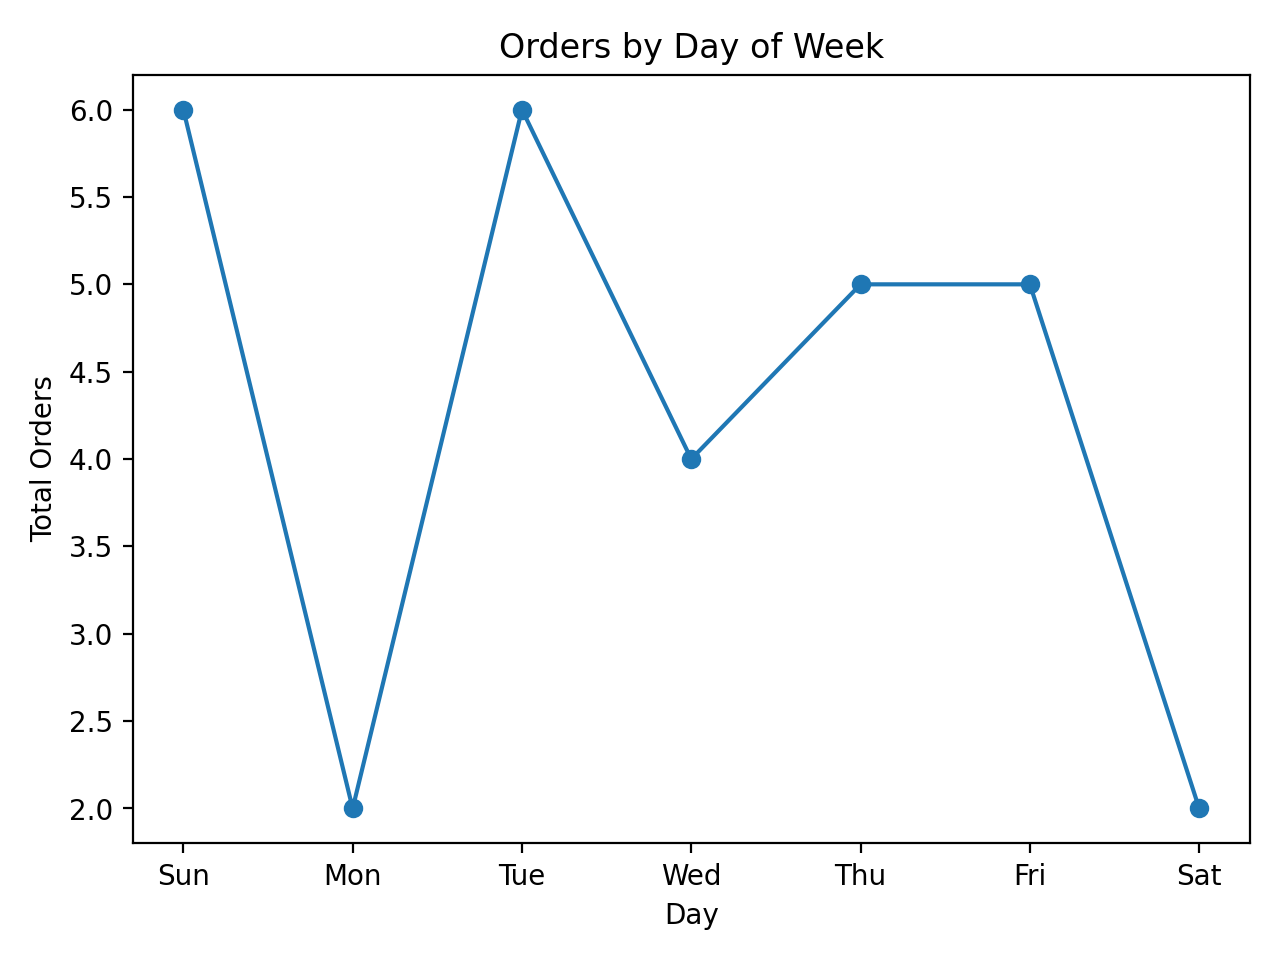

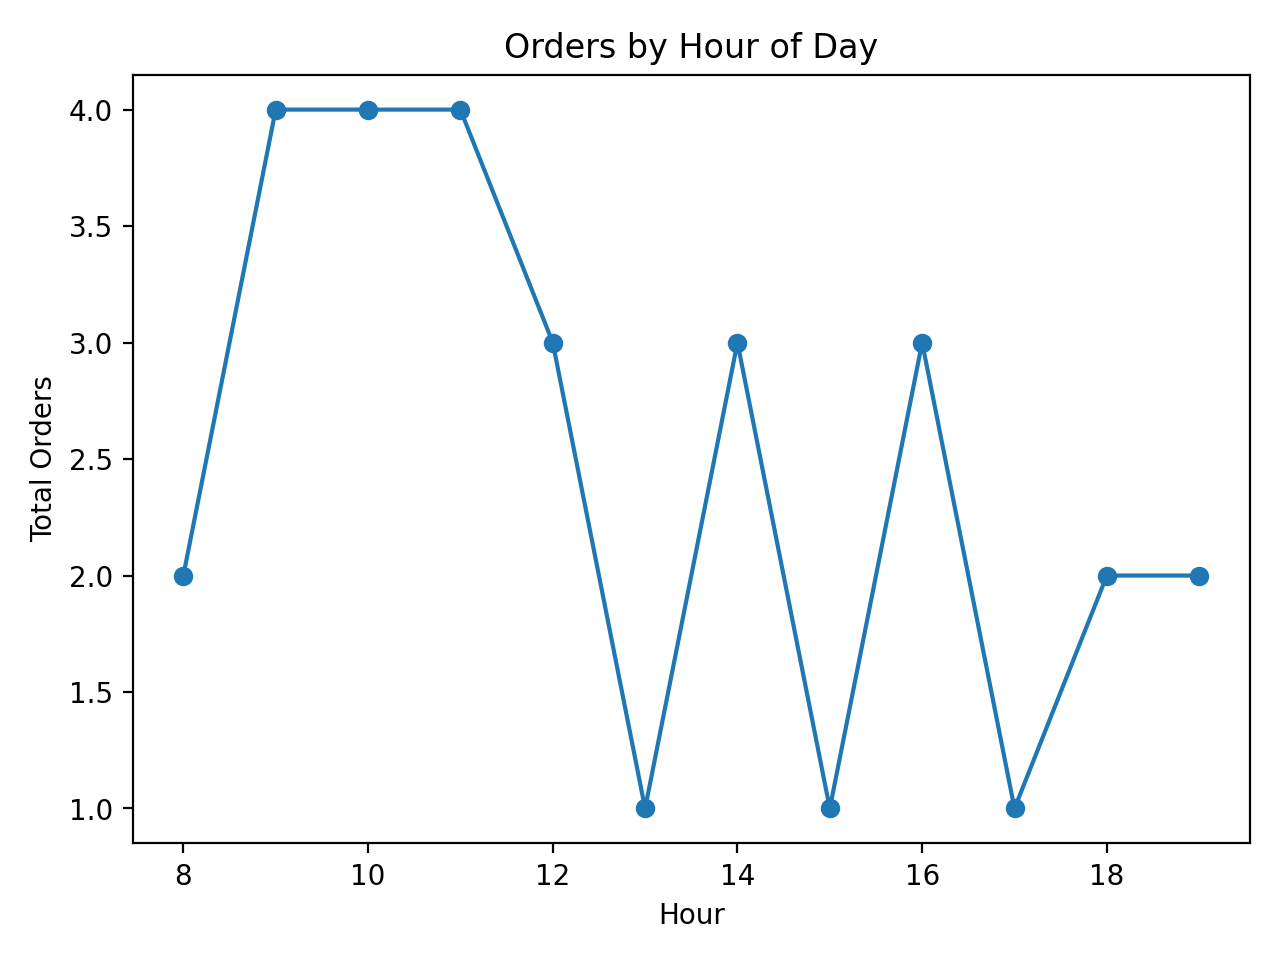

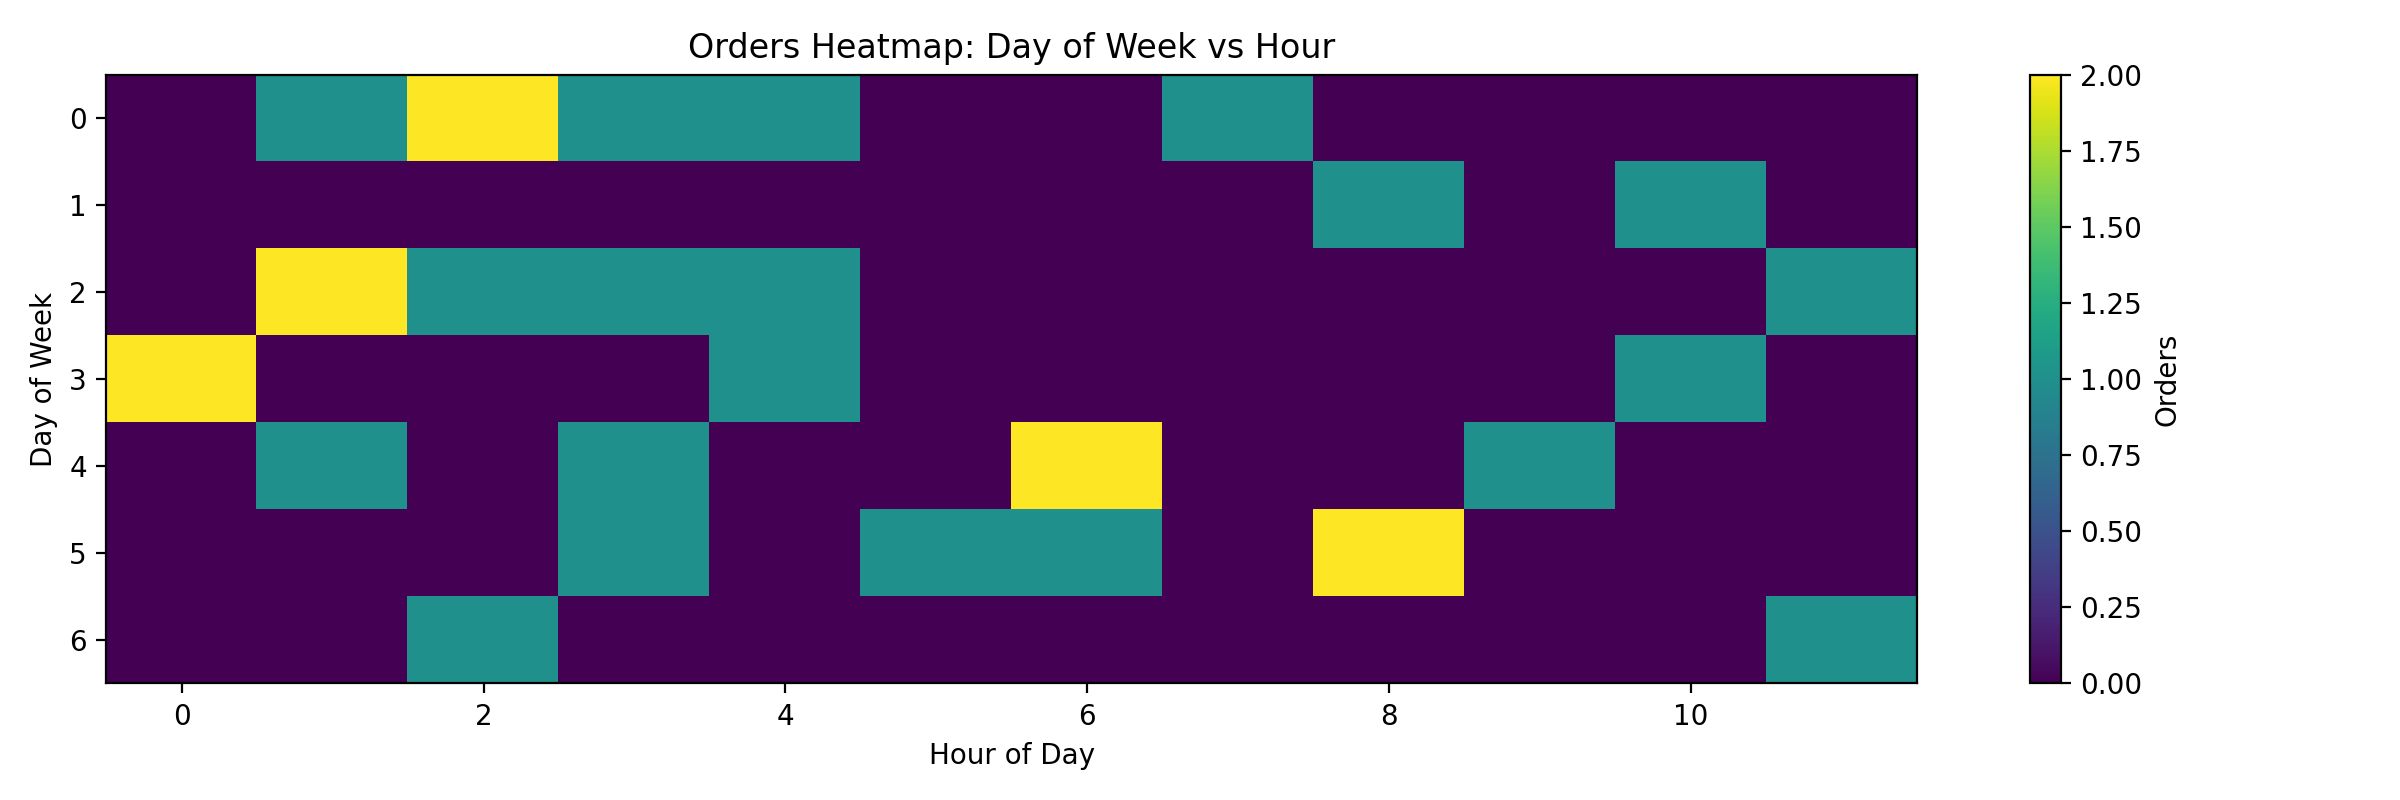

In [7]:
show_png("orders_by_dow.png")
show_png("orders_by_hour.png")
show_png("dow_hour_heatmap.png")


# Recommendations (Business Actions)

1. **Inventory**
   - Maintain safety stock for top products (reduce stockouts on anchor items).
   - Focus replenishment on high reorder departments to protect repeat demand.

2. **Operations**
   - Use the day/hour pattern to schedule staffing and picking waves.
   - Pre-stage fast movers before peak windows to reduce fulfillment time.

3. **Next Steps**
   - Incorporate **calendar seasonality** (holidays) and **promotions/pricing** data.
   - Add a simple forecasting layer (baseline time-series) for demand planning.
